<a href="https://colab.research.google.com/github/Sayandeep27/Gen-AI-with-Sayandeep/blob/main/Detect_Human_(Tanmay's_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [5]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:

def detect_human_huggingface(image_path):

    image = Image.open(image_path)


    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)


    target_sizes = torch.tensor([image.size[::-1]])  # (height, width)
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    human_detected = False


    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        if label.item() == 1:  # Label 1 corresponds to 'person'
            human_detected = True
            print("Human detected!")
            draw = ImageDraw.Draw(image)

            draw.rectangle(box.tolist(), outline="red", width=3)

    if not human_detected:
        print("No human detected in the image.")


    plt.imshow(image)
    plt.axis("off")
    plt.show()


No human detected in the image.


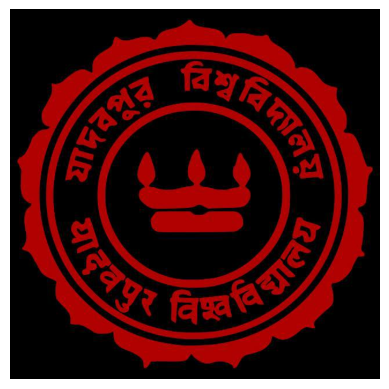

In [7]:

image_path = 'julogo.jpg'
detect_human_huggingface(image_path)

Human detected!
Human detected!
Human detected!
Human detected!


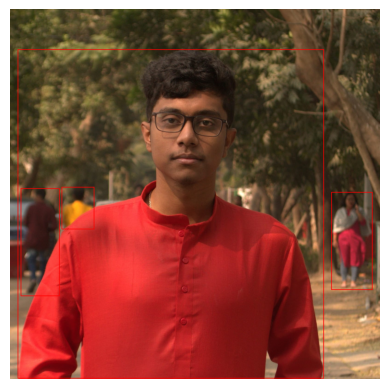

In [8]:

image_path = 'Sayandeep Sarkar.jpeg'
detect_human_huggingface(image_path)

No human detected in the image.


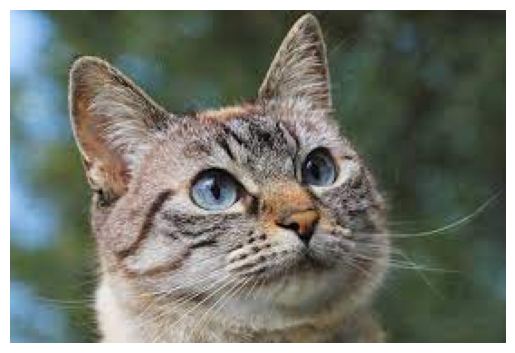

In [9]:

image_path = 'cat.jpg'
detect_human_huggingface(image_path)

Human detected!
Human detected!
Human detected!
Human detected!
Human detected!


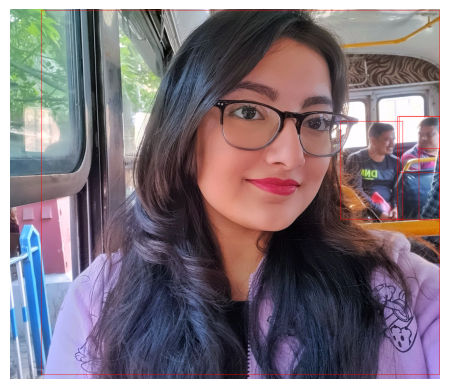

In [10]:

image_path = 'Srijas.jpg'
detect_human_huggingface(image_path)

Human detected!
Human detected!
Human detected!
Human detected!
Human detected!
Human detected!


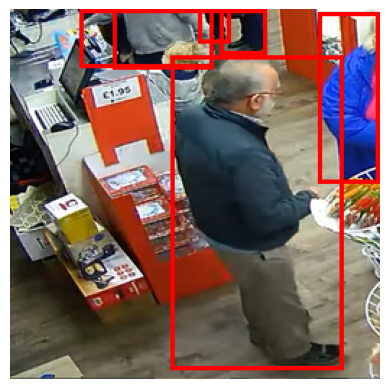

In [11]:

image_path = '17.png'
detect_human_huggingface(image_path)

No human detected in the image.


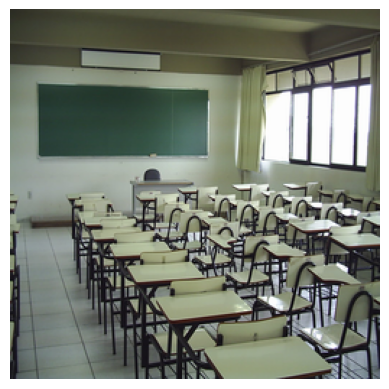

In [12]:

image_path = '5.png'
detect_human_huggingface(image_path)